# Practical work: optimizing a bridge structure 


## Installation of the *truss* package

For this session, you will need the Python package Truss that can be download here:

https://github.com/lcharleux/truss/archive/master.zip

Dowload it, extract the content of the archive and put it in your work directory. Once this is completed, execute the cell below to check the install is working.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import sys, copy, os
from scipy import optimize
sys.path.append("truss-master")
try:
    import truss
    print("Truss is correctly installed")
except:
    print("Truss is NOT correctly installed !")
    

Truss is correctly installed


A short truss tutorial is available here:

http://truss.readthedocs.io/en/latest/tutorial.html

## Building the bridge structure

In this session, we will modelled a bridge structure using truss and optimize it using various criteria. The basic structure is introduced below. It is made of steel bars and loaded with one vertical force on $G$. The bridge is symmetrical so only the left half is modelled.

<IPython.core.display.Javascript object>


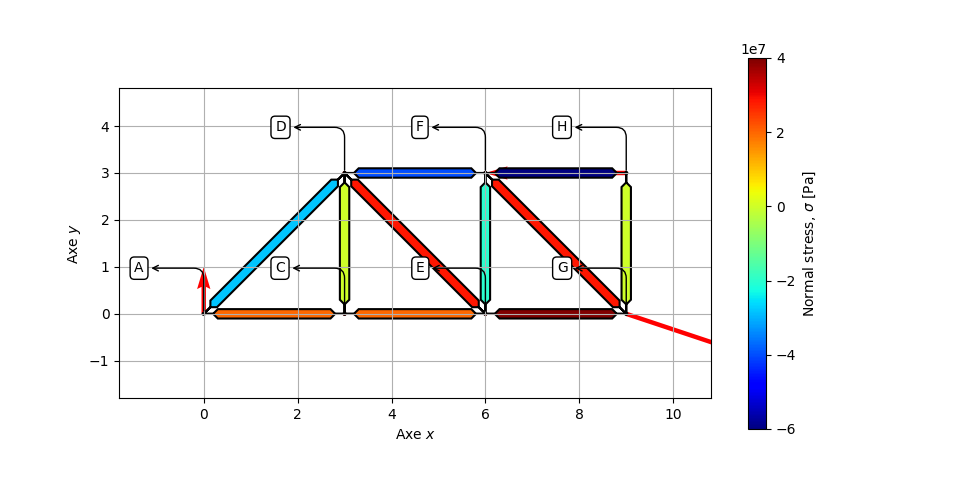

In [3]:
E       = 210.e9   # Young Modulus [Pa]
rho     = 7800.    # Density       [kg/m**3]
A       = 5.e-2    # Cross section [m**2]
sigmay  = 400.e6   # Yield Stress  [Pa]

# Model definition 
model = truss.core.Model() # Model definition 

# NODES
nA = model.add_node((0.,0.), label = "A") 
nC = model.add_node((3.,0.), label = "C")
nD = model.add_node((3.,3.), label = "D")
nE = model.add_node((6.,0.), label = "E")
nF = model.add_node((6.,3.), label = "F")
nG = model.add_node((9.,0.), label = "G")
nH = model.add_node((9.,3.), label = "H")

# BOUNDARY CONDITIONS
nA.block[1] = True
nG.block[0] = True
nH.block[0] = True

# BARS
AC = model.add_bar(nA, nC, modulus = E, density = rho, section = A, yield_stress = sigmay)
CD = model.add_bar(nC, nD, modulus = E, density = rho, section = A, yield_stress = sigmay)
AD = model.add_bar(nA, nD, modulus = E, density = rho, section = A, yield_stress = sigmay)
CE = model.add_bar(nC, nE, modulus = E, density = rho, section = A, yield_stress = sigmay)
DF = model.add_bar(nD, nF, modulus = E, density = rho, section = A, yield_stress = sigmay)
DE = model.add_bar(nD, nE, modulus = E, density = rho, section = A, yield_stress = sigmay)
EF = model.add_bar(nE, nF, modulus = E, density = rho, section = A, yield_stress = sigmay)
EG = model.add_bar(nE, nG, modulus = E, density = rho, section = A, yield_stress = sigmay)
FH = model.add_bar(nF, nH, modulus = E, density = rho, section = A, yield_stress = sigmay)
FG = model.add_bar(nF, nG, modulus = E, density = rho, section = A, yield_stress = sigmay)
GH = model.add_bar(nG, nH, modulus = E, density = rho, section = A, yield_stress = sigmay)

# STRUCTURAL LOADING
nG.force = np.array([0., -1.e6])


model.solve()



xlim, ylim = model.bbox(deformed = False)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
#ax.axis("off")
model.draw(ax, deformed = False, field = "stress", label = True, force_scale = 1.e-6, forces = True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()  
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

### Detailed results at the nodes

In [5]:
model.data(at = "nodes")

block        coords            disp              force        label
      bx     by      x  y           ux          uy     Fx     Fy     o
0  False   True      0  0  -0.00114286           0      0  1e+06     A
1  False  False      3  0 -0.000857143 -0.00337955      0      0     C
2  False  False      3  3   0.00142857 -0.00337955      0      0     D
3  False  False      6  0 -0.000571429 -0.00618767      0      0     E
4  False  False      6  3  0.000857143 -0.00647339      0      0     F
5   True  False      9  0            0 -0.00813865  3e+06 -1e+06     G
6   True  False      9  3            0 -0.00813865 -3e+06      0     H

### Detailed results on the bars

In [6]:
model.data(at = "bars")

conn    direction           geometry             props                   \
     c1 c2        dx        dy   length    volume density     mass section   
0     A  C         1         0        3      0.15    7800     1170    0.05   
1     C  D         0         1        3      0.15    7800     1170    0.05   
2     A  D  0.707107  0.707107  4.24264  0.212132    7800  1654.63    0.05   
3     C  E         1         0        3      0.15    7800     1170    0.05   
4     D  F         1         0        3      0.15    7800     1170    0.05   
5     D  E  0.707107 -0.707107  4.24264  0.212132    7800  1654.63    0.05   
6     E  F         0         1        3      0.15    7800     1170    0.05   
7     E  G         1         0        3      0.15    7800     1170    0.05   
8     F  H         1         0        3      0.15    7800     1170    0.05   
9     F  G  0.707107 -0.707107  4.24264  0.212132    7800  1654.63    0.05   
10    G  H         0         1        3      0.15    7800     1170    0.05   

          state                                                 
     elongation failure       strain       stress      tension  
0   0.000285714   False  9.52381e-05        2e+07        1e+06  
1             0   False            0            0            0  
2  -0.000571429   False -0.000134687 -2.82843e+07 -1.41421e+06  
3   0.000285714   False  9.52381e-05        2e+07        1e+06  
4  -0.000571429   False -0.000190476       -4e+07       -2e+06  
5   0.000571429   False  0.000134687  2.82843e+07  1.41421e+06  
6  -0.000285714   False -9.52381e-05       -2e+07       -1e+06  
7   0.000571429   False  0.000190476        4e+07        2e+06  
8  -0.000857143   False -0.000285714       -6e+07       -3e+06  
9   0.000571429   False  0.000134687  2.82843e+07  1.41421e+06  
10            0   False            0            0            0

### Dead (or structural) mass


In [7]:
m0 = model.mass() 
m0 * 1.e-3 # Mass in tons !

14.323889603929565

## Questions

**Question 1**: Verify that the yield stress is not exceeded anywhere, do you think this structure has an optimimum weight ? You can use the *state/failure* data available on the whole model.

In [10]:
# Example: 
model.data(at = "bars").state.failure.values

#...

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=object)

**Question 2**: Modify all the cross sections at the same time in order to minimize weight while keeping acceptable stress level.

In [20]:
new_section = 9e-3
for bar in model.bars:
    bar.section = new_section

model.solve()
model.data(at = "bars").state.failure.values

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=object)

In [21]:
m1 = model.mass()
m1 *1.e-3 # mass in tons.

2.5783001287073213

In [22]:
print("Reduced mass by {0} kg".format(m0 - m1))

Reduced mass by 11745.589475222245 kg


**Question 2**: We want to modify the position along the $\vec y$ axis of the points $D$, $F$ and $H$ in order to minimize the vertical displacement of the node $G$ times the mass of the structure $\alpha$: 

$$
\alpha = |u_y(G)| m
$$

Where $u_y(G)$ is the displacement of the node $G$ along the $\vec y$ axis and $m$ the mass of the whole structure.

Do not further modify the sections determined in question 4. Comment the solution.

In [23]:
def alpha(X):
    """
    Cost function
    """
    nD.coords[1] = X[0]
    nF.coords[1] = X[1]
    nH.coords[1] = X[2]
    model.solve()
    return abs(nG.displacement[1]) * model.mass()

X0 = [nD.coords[1], nF.coords[1], nH.coords[1]]
optimize.minimize(alpha, X0, method = "nelder-mead")

 final_simplex: (array([[ 4.38852518,  6.78893013,  7.88899665],
       [ 4.3885601 ,  6.78897912,  7.88904305],
       [ 4.38852112,  6.78886878,  7.88890582],
       [ 4.38851249,  6.78893348,  7.88896171]]), array([ 55.72033484,  55.72033484,  55.72033484,  55.72033484]))
           fun: 55.720334836932807
       message: 'Optimization terminated successfully.'
          nfev: 148
           nit: 80
        status: 0
       success: True
             x: array([ 4.38852518,  6.78893013,  7.88899665])

<IPython.core.display.Javascript object>


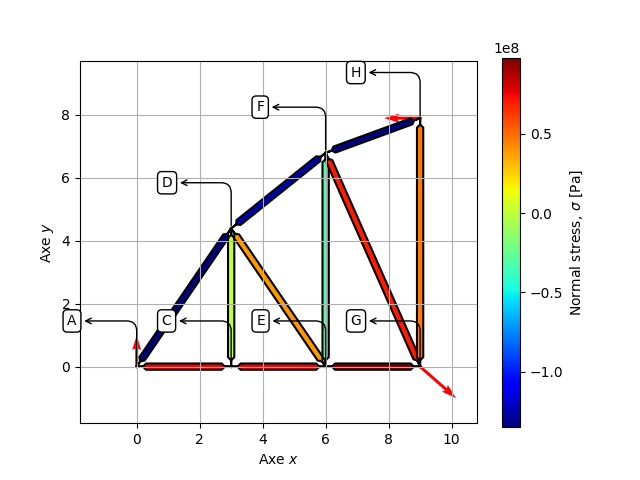

In [24]:
xlim, ylim = model.bbox(deformed = False)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
#ax.axis("off")
model.draw(ax, deformed = False, field = "stress", label = True, force_scale = 1.e-6, forces = True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()  
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

In [25]:
model.mass()

3731.6926000388758

**Question 3**: Same question with displacements also along $\vec x$ of $C$, $D$, $E$ and $F$. Is it better ?

In [26]:
def alpha(X):
    """
    Cost function
    """
    nD.coords[1] = X[0]
    nF.coords[1] = X[1]
    nH.coords[1] = X[2]
    nC.coords[0] = X[3]
    nD.coords[0] = X[4]
    nE.coords[0] = X[5]
    nF.coords[0] = X[6]
    model.solve()
    return abs(nG.displacement[1]) * model.mass()

X0 = [nD.coords[1], nF.coords[1], nH.coords[1], nC.coords[0], nD.coords[0], nE.coords[0], nF.coords[0],]
sol = optimize.minimize(alpha, X0, method = "nelder-mead", options = {"maxfev": 1000})


<IPython.core.display.Javascript object>


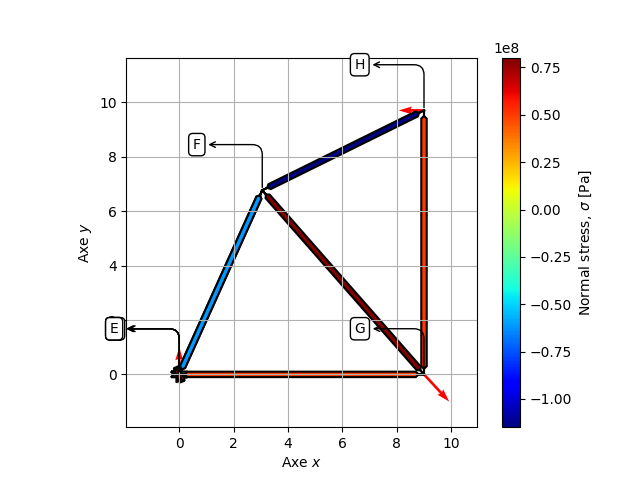

In [27]:
xlim, ylim = model.bbox(deformed = False)
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
#ax.axis("off")
model.draw(ax, deformed = False, field = "stress", label = True, force_scale = 1.e-6, forces = True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()  
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

**Question 4**:  You can now try to perform topological optimization by removing/merging well chosen beams and nodes. In order to make the structure even more efficient.

<IPython.core.display.Javascript object>


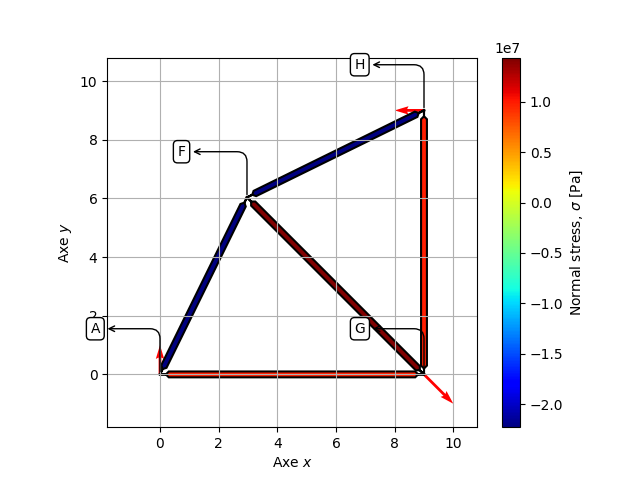

conn    direction           geometry             props                   \
    c1 c2        dx        dy   length    volume density     mass section   
0    A  G         1         0        9      0.45    7800     3510    0.05   
1    F  G  0.707104 -0.707109  8.53438  0.426719    7800  3328.41    0.05   
2    H  G         0        -1  8.99999  0.449999    7800     3510    0.05   
3    A  F  0.441008  0.897503  6.72392  0.336196    7800  2622.33    0.05   
4    F  H  0.897505  0.441004  6.72386  0.336193    7800   2622.3    0.05   

         state                                                
    elongation failure       strain       stress     tension  
0  0.000421176   False  4.67974e-05  9.82745e+06      491372  
1  0.000584656   False  6.85059e-05  1.43862e+07      719312  
2  0.000421172   False  4.67969e-05  9.82735e+06      491367  
3 -0.000713506   False -0.000106115  -2.2284e+07 -1.1142e+06  
4 -0.000713498   False -0.000106114  -2.2284e+07 -1.1142e+06

In [28]:
model2 = truss.core.Model() # Model definition 

# NODES
nA = model2.add_node((0.,0.), label = "A") 
#nC = model2.add_node((3.,0.), label = "C")
#nD = model2.add_node((3.,3.), label = "D")
#nE = model2.add_node((6.,0.), label = "E")
nF = model2.add_node((6.,3.), label = "F")
nG = model2.add_node((9.,0.), label = "G")
nH = model2.add_node((9.,3.), label = "H")

# BOUNDARY CONDITIONS
nA.block[1] = True
nG.block[0] = True
nH.block[0] = True

#G.force = np.array([0., -1.])*1.e4
#C.force[0] = .2
#C.force[1] = -0.

# BARS
AG = model2.add_bar(nA, nG, modulus = E, density = rho, section = A, yield_stress = sigmay)
FG = model2.add_bar(nF, nG, modulus = E, density = rho, section = A, yield_stress = sigmay)
HG = model2.add_bar(nH, nG, modulus = E, density = rho, section = A, yield_stress = sigmay)
AF = model2.add_bar(nA, nF, modulus = E, density = rho, section = A, yield_stress = sigmay)
FH = model2.add_bar(nF, nH, modulus = E, density = rho, section = A, yield_stress = sigmay)

# STRUCTURAL LOADING
nG.force = np.array([0., -1.e6])


def alpha(X):
    """
    Cost function
    """
    nF.coords[1] = X[0]
    nH.coords[1] = X[1]
    nF.coords[0] = X[2]
    model2.solve()
    return abs(nG.displacement[1]) * model2.mass()

X0 = [nF.coords[1], nH.coords[1], nF.coords[0]]
optimize.minimize(alpha, X0, method = "nelder-mead")



xlim, ylim = model2.bbox(deformed = False)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
#ax.axis("off")
model2.draw(ax, deformed = False, field = "stress", label = True, force_scale = 1.e-6, forces = True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()  
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

model2.data("bars")

**Question 5**: You are now asked to optimize the cross section along with the position of $C$, $D$, $E$ and $F$ in order to reach the yield stress in each individual beam.

In [31]:
def beta(X):
    """
    Cost function
    """
    for i in range(len(X)):
        model2.bars[i].section = X[i]
    model2.solve()
    return ((abs(model2.data("bars").state.stress.values) - sigmay)**2).sum()

X0 = [bar.section for bar in model2.bars]
sol = optimize.minimize(beta, X0, method = "nelder-mead", options = {"maxfev": 10000, "maxiter":10000})
print(sol)

 final_simplex: (array([[ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ],
       [ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ],
       [ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ],
       [ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ],
       [ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ],
       [ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ]]), array([  2.97847541e-05,   3.19142091e-05,   6.14199041e-05,
         6.79913576e-05,   9.23648260e-05,   9.69464409e-05]))
           fun: 2.9784754058681528e-05
       message: 'Optimization terminated successfully.'
          nfev: 1326
           nit: 798
        status: 0
       success: True
             x: array([ 0.00122843,  0.00179828, -0.00122842,  0.00278551,  0.0027855 ])


<IPython.core.display.Javascript object>


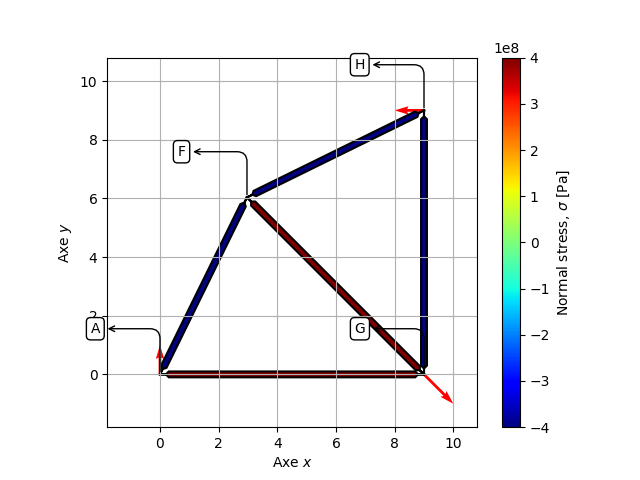

conn    direction           geometry              props           \
    c1 c2        dx        dy   length     volume density     mass   
0    A  G         1         0        9  0.0110559    7800  86.2358   
1    F  G  0.707104 -0.707109  8.53438  0.0153472    7800  119.708   
2    H  G         0        -1  8.99999 -0.0110558    7800 -86.2349   
3    A  F  0.441008  0.897503  6.72392  0.0187295    7800   146.09   
4    F  H  0.897505  0.441004  6.72386  0.0187293    7800  146.089   

                   state                                         
      section elongation failure      strain stress     tension  
0  0.00122843  0.0171429    True  0.00190476  4e+08      491372  
1  0.00179828   0.016256    True  0.00190476  4e+08      719312  
2 -0.00122842 -0.0171428   False -0.00190476 -4e+08      491367  
3  0.00278551 -0.0128075   False -0.00190476 -4e+08 -1.1142e+06  
4   0.0027855 -0.0128073    True -0.00190476 -4e+08 -1.1142e+06

In [32]:
xlim, ylim = model2.bbox(deformed = False)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
#ax.axis("off")
model2.draw(ax, deformed = False, field = "stress", label = True, force_scale = 1.e-6, forces = True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()  
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

model2.data("bars")

In [33]:
model2.mass()

411.88822182853846

As a conclusion, it is observed that the mass reduction is huge in this case.